# Chicago Divvy Bicycle Sharing Data Analysis and Visualization
In this notebook, I did exploratory data analysis and modeling on Chicago Divvy bicycle sharing data. This project answers the following questions:
* Why do we care about such a project?
* Who are using Divvy bicycles, and what're the differences between those users?
* When (when in every day, which days among a week, which months among a year, rainy or sunny) do people use sharing bicycles more frequently?
* Any difference between weekdays and weekends?
* During weekdays, do popular stations serve for different purposes, and what're those purposes?
* How about unpopular stations?
* How about the situations of popular/unpopular stations during weekends?

## import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc, os
from datetime import datetime

# python scripts for requesting weather using API, and a function merging different databases
from weather_request import query_prcp,query_temp
from merge_function import merge_data

%matplotlib inline

In [112]:
# import folium for interactive data visualization
import folium
from folium import plugins
from IPython.display import display

# 1. Data Preprocessing 
## a) Query weather data
In this project, I write a wrapper to download the historical weathers of Chicago between 2013-2017 from [National Oceanic and Atmospheric Administration](https://www.noaa.gov)

In [2]:
# Query precipitation data in different years
key = '***************'
years = [2013, 2014, 2015, 2016, 2017]

for year in years:
    path = './data/prcp_' + str(year) + '.csv'
    if os.path.isfile(path):
        continue
    df, _ = query_prcp(key=key, year=year)
    df.to_csv(path)
    print('File saved:\t', path)

In [3]:
# Query temperature data in different years
key = '***************'
years = [2013, 2014, 2015, 2016, 2017]

for year in years:
    path = './data/temp_' + str(year) + '.csv'
    if os.path.isfile(path):
        continue
    df, _ = query_temp(key=key, year=year)
    df.to_csv(path)
    print('File saved:\t', path)

## b) Merge annual data for 2013-2017

In [5]:
# merging bicycle datas with temp and prcp in 2013
if not os.path.isfile('./data/df_2013.csv'):
    prcp_2013 = pd.read_csv('./data/prcp_2013.csv', parse_dates=['date'])
    temp_2013 = pd.read_csv('./data/temp_2013.csv', parse_dates=['date'])
    trip_2013 = pd.read_csv('./trip_data/2013/Divvy_Trips_2013.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    station_2013 = pd.read_csv('./trip_data/2013/Divvy_Stations_2013.csv')

    df_2013 = merge_data(prcp_2013,temp_2013,trip_2013,station_2013)
    df_2013.to_csv('./data/df_2013.csv')
    del prcp_2013,temp_2013,trip_2013,station_2013
    _ = gc.collect()

In [6]:
# merging bicycle datas with temp and prcp in 2014
if (not os.path.isfile('./data/df_2014_Q1Q2.csv')) and (not os.path.isfile('./data/df_2014_Q3_07.csv'))\
and (not os.path.isfile('./data/df_2014_Q3_0809.csv')) and (not os.path.isfile('./data/df_2014_Q4.csv')):
    prcp_2014 = pd.read_csv('./data/prcp_2014.csv', parse_dates=['date'])
    temp_2014 = pd.read_csv('./data/temp_2014.csv', parse_dates=['date'])

    trip_2014_Q1Q2 = pd.read_csv('./trip_data/2014_Q1Q2/Divvy_Trips_2014_Q1Q2.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    station_2014_Q1Q2 = pd.read_excel('./trip_data/2014_Q1Q2/Divvy_Stations_2014-Q1Q2.xlsx')

    trip_2014_Q3_07 = pd.read_csv('./trip_data/2014_Q3Q4/Divvy_Trips_2014-Q3-07.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2014_Q3_0809 = pd.read_csv('./trip_data/2014_Q3Q4/Divvy_Trips_2014-Q3-0809.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2014_Q4 = pd.read_csv('./trip_data/2014_Q3Q4/Divvy_Trips_2014-Q4.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    station_2014_Q3Q4 = pd.read_csv('./trip_data/2014_Q3Q4/Divvy_Stations_2014-Q3Q4.csv')

    trip_2014_Q1Q2.rename(columns={'birthyear': 'birthday'}, inplace=True)
    trip_2014_Q3_07.rename(columns={'birthyear': 'birthday'}, inplace=True)
    trip_2014_Q3_0809.rename(columns={'birthyear': 'birthday'}, inplace=True)
    trip_2014_Q4.rename(columns={'birthyear': 'birthday'}, inplace=True)

    df_2014_Q1Q2 = merge_data(prcp_2014,temp_2014,trip_2014_Q1Q2,station_2014_Q1Q2)
    df_2014_Q3_07 = merge_data(prcp_2014,temp_2014,trip_2014_Q3_07,station_2014_Q3Q4)
    df_2014_Q3_0809 = merge_data(prcp_2014,temp_2014,trip_2014_Q3_0809,station_2014_Q3Q4)
    df_2014_Q4 = merge_data(prcp_2014,temp_2014,trip_2014_Q4,station_2014_Q3Q4)

    df_2014_Q1Q2.to_csv('./data/df_2014_Q1Q2.csv')
    df_2014_Q3_07.to_csv('./data/df_2014_Q3_07.csv')
    df_2014_Q3_0809.to_csv('./data/df_2014_Q3_0809.csv')
    df_2014_Q4.to_csv('./data/df_2014_Q4.csv')

    del trip_2014_Q1Q2,station_2014_Q1Q2,trip_2014_Q3_07,trip_2014_Q3_0809,trip_2014_Q4,station_2014_Q3Q4
    _ = gc.collect()

In [7]:
# merging bicycle datas with temp and prcp in 2015
if (not os.path.isfile('./data/df_2015_Q1.csv')) and (not os.path.isfile('./data/df_2015_Q2.csv'))\
and (not os.path.isfile('./data/df_2015_07.csv')) and (not os.path.isfile('./data/df_2015_08.csv'))\
and (not os.path.isfile('./data/df_2015_09.csv')) and (not os.path.isfile('./data/df_2015_Q4.csv')):
    prcp_2015 = pd.read_csv('./data/prcp_2015.csv', parse_dates=['date'])
    temp_2015 = pd.read_csv('./data/temp_2015.csv', parse_dates=['date'])
    trip_2015_Q1 = pd.read_csv('./trip_data/2015_Q1Q2/Divvy_Trips_2015-Q1.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2015_Q2 = pd.read_csv('./trip_data/2015_Q1Q2/Divvy_Trips_2015-Q2.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    station_2015 = pd.read_csv('./trip_data/2015_Q1Q2/Divvy_Stations_2015.csv')

    trip_2015_07 = pd.read_csv('./trip_data/2015_Q3Q4/Divvy_Trips_2015_07.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2015_08 = pd.read_csv('./trip_data/2015_Q3Q4/Divvy_Trips_2015_08.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2015_09 = pd.read_csv('./trip_data/2015_Q3Q4/Divvy_Trips_2015_09.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2015_Q4 = pd.read_csv('./trip_data/2015_Q3Q4/Divvy_Trips_2015_Q4.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])

    trip_2015_Q1.rename(columns={'birthyear': 'birthday'}, inplace=True)
    trip_2015_Q2.rename(columns={'birthyear': 'birthday'}, inplace=True)
    trip_2015_07.rename(columns={'birthyear': 'birthday'}, inplace=True)
    trip_2015_08.rename(columns={'birthyear': 'birthday'}, inplace=True)
    trip_2015_09.rename(columns={'birthyear': 'birthday'}, inplace=True)
    trip_2015_Q4.rename(columns={'birthyear': 'birthday'}, inplace=True)

    df_2015_Q1 = merge_data(prcp_2015,temp_2015,trip_2015_Q1,station_2015)
    df_2015_Q2 = merge_data(prcp_2015,temp_2015,trip_2015_Q2,station_2015)
    df_2015_07 = merge_data(prcp_2015,temp_2015,trip_2015_07,station_2015)
    df_2015_08 = merge_data(prcp_2015,temp_2015,trip_2015_08,station_2015)
    df_2015_09 = merge_data(prcp_2015,temp_2015,trip_2015_09,station_2015)
    df_2015_Q4 = merge_data(prcp_2015,temp_2015,trip_2015_Q4,station_2015)

    df_2015_Q1.to_csv('./data/df_2015_Q1.csv')
    df_2015_Q2.to_csv('./data/df_2015_Q2.csv')
    df_2015_07.to_csv('./data/df_2015_07.csv')
    df_2015_08.to_csv('./data/df_2015_08.csv')
    df_2015_09.to_csv('./data/df_2015_09.csv')
    df_2015_Q4.to_csv('./data/df_2015_Q4.csv')

    del trip_2015_Q1,trip_2015_Q2,station_2015,trip_2015_07,trip_2015_08,trip_2015_09,trip_2015_Q4
    _ = gc.collect()

In [8]:
# merging bicycle datas with temp and prcp in 2016
if (not os.path.isfile('./data/df_2016_Q1.csv')) and (not os.path.isfile('./data/df_2016_04.csv'))\
and (not os.path.isfile('./data/df_2016_05.csv')) and (not os.path.isfile('./data/df_2016_06.csv'))\
and (not os.path.isfile('./data/df_2016_Q3.csv')) and (not os.path.isfile('./data/df_2016_Q4.csv')):
    prcp_2016 = pd.read_csv('./data/prcp_2016.csv', parse_dates=['date'])
    temp_2016 = pd.read_csv('./data/temp_2016.csv', parse_dates=['date'])
    trip_2016_Q1 = pd.read_csv('./trip_data/2016_Q1Q2/Divvy_Trips_2016_Q1.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2016_04 = pd.read_csv('./trip_data/2016_Q1Q2/Divvy_Trips_2016_04.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2016_05 = pd.read_csv('./trip_data/2016_Q1Q2/Divvy_Trips_2016_05.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2016_06 = pd.read_csv('./trip_data/2016_Q1Q2/Divvy_Trips_2016_06.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    station_2016_Q1Q2 = pd.read_csv('./trip_data/2016_Q1Q2/Divvy_Stations_2016_Q1Q2.csv')

    trip_2016_Q3 = pd.read_csv('./trip_data/2016_Q3Q4/Divvy_Trips_2016_Q3.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2016_Q4 = pd.read_csv('./trip_data/2016_Q3Q4/Divvy_Trips_2016_Q4.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    station_2016_Q3 = pd.read_csv('./trip_data/2016_Q3Q4/Divvy_Stations_2016_Q3.csv')
    station_2016_Q4 = pd.read_csv('./trip_data/2016_Q3Q4/Divvy_Stations_2016_Q4.csv')

    trip_2016_Q1.rename(columns={'birthyear': 'birthday'}, inplace=True)
    trip_2016_04.rename(columns={'birthyear': 'birthday'}, inplace=True)
    trip_2016_05.rename(columns={'birthyear': 'birthday'}, inplace=True)
    trip_2016_06.rename(columns={'birthyear': 'birthday'}, inplace=True)
    trip_2016_Q3.rename(columns={'birthyear': 'birthday'}, inplace=True)
    trip_2016_Q4.rename(columns={'birthyear': 'birthday'}, inplace=True)

    df_2016_Q1 = merge_data(prcp_2016,temp_2016,trip_2016_Q1,station_2016_Q1Q2)
    df_2016_04 = merge_data(prcp_2016,temp_2016,trip_2016_04,station_2016_Q1Q2)
    df_2016_05 = merge_data(prcp_2016,temp_2016,trip_2016_05,station_2016_Q1Q2)
    df_2016_06 = merge_data(prcp_2016,temp_2016,trip_2016_06,station_2016_Q1Q2)
    df_2016_Q3 = merge_data(prcp_2016,temp_2016,trip_2016_Q3,station_2016_Q3)
    df_2016_Q4 = merge_data(prcp_2016,temp_2016,trip_2016_Q4,station_2016_Q4)

    df_2016_Q1.to_csv('./data/df_2016_Q1.csv')
    df_2016_04.to_csv('./data/df_2016_04.csv')
    df_2016_05.to_csv('./data/df_2016_05.csv')
    df_2016_06.to_csv('./data/df_2016_06.csv')
    df_2016_Q3.to_csv('./data/df_2016_Q3.csv')
    df_2016_Q4.to_csv('./data/df_2016_Q4.csv')

    del trip_2016_Q1,trip_2016_04,trip_2016_05,trip_2016_06,station_2016_Q1Q2,trip_2016_Q3,trip_2016_Q4,station_2016_Q3,station_2016_Q4
    _ = gc.collect()

In [9]:
# merging bicycle datas with temp and prcp in 2017
if (not os.path.isfile('./data/df_2017_Q1.csv')) and (not os.path.isfile('./data/df_2017_Q2.csv'))\
and (not os.path.isfile('./data/df_2017_Q3.csv')) and (not os.path.isfile('./data/df_2017_Q4.csv')):
    prcp_2017 = pd.read_csv('./data/prcp_2017.csv', parse_dates=['date'])
    temp_2017 = pd.read_csv('./data/temp_2017.csv', parse_dates=['date'])

    trip_2017_Q1 = pd.read_csv('./trip_data/2017_Q1Q2/Divvy_Trips_2017_Q1.csv', low_memory=False, 
                            parse_dates=['start_time', 'end_time'])
    trip_2017_Q2 = pd.read_csv('./trip_data/2017_Q1Q2/Divvy_Trips_2017_Q2.csv', low_memory=False, 
                            parse_dates=['start_time', 'end_time'])
    station_2017_Q1Q2 = pd.read_csv('./trip_data/2017_Q1Q2/Divvy_Stations_2017_Q1Q2.csv')

    trip_2017_Q3 = pd.read_csv('./trip_data/2017_Q3Q4/Divvy_Trips_2017_Q3.csv', low_memory=False, 
                            parse_dates=['start_time', 'end_time'])
    trip_2017_Q4 = pd.read_csv('./trip_data/2017_Q3Q4/Divvy_Trips_2017_Q4.csv', low_memory=False, 
                            parse_dates=['start_time', 'end_time'])
    station_2017_Q3Q4 = pd.read_csv('./trip_data/2017_Q3Q4/Divvy_Stations_2017_Q3Q4.csv')

    trip_2017_Q1.rename(columns={'start_time': 'starttime', 'end_time': 'stoptime'}, inplace=True)
    trip_2017_Q2.rename(columns={'start_time': 'starttime', 'end_time': 'stoptime'}, inplace=True)
    trip_2017_Q3.rename(columns={'start_time': 'starttime', 'end_time': 'stoptime'}, inplace=True)
    trip_2017_Q4.rename(columns={'start_time': 'starttime', 'end_time': 'stoptime'}, inplace=True)

    trip_2017_Q1.rename(columns={'birthyear': 'birthday'}, inplace=True)
    trip_2017_Q2.rename(columns={'birthyear': 'birthday'}, inplace=True)
    trip_2017_Q3.rename(columns={'birthyear': 'birthday'}, inplace=True)
    trip_2017_Q4.rename(columns={'birthyear': 'birthday'}, inplace=True)

    df_2017_Q1 = merge_data(prcp_2017,temp_2017,trip_2017_Q1,station_2017_Q1Q2)
    df_2017_Q2 = merge_data(prcp_2017,temp_2017,trip_2017_Q2,station_2017_Q1Q2)
    df_2017_Q3 = merge_data(prcp_2017,temp_2017,trip_2017_Q3,station_2017_Q3Q4)
    df_2017_Q4 = merge_data(prcp_2017,temp_2017,trip_2017_Q4,station_2017_Q3Q4)

    df_2017_Q1.to_csv('./data/df_2017_Q1.csv')
    df_2017_Q2.to_csv('./data/df_2017_Q2.csv')
    df_2017_Q3.to_csv('./data/df_2017_Q3.csv')
    df_2017_Q4.to_csv('./data/df_2017_Q4.csv')

    del trip_2017_Q1,trip_2017_Q2,station_2017_Q1Q2,trip_2017_Q3,trip_2017_Q4,station_2017_Q3Q4
    _ = gc.collect()

In [11]:
# merging annual data into raw_data.csv
if not os.path.isfile('./data/raw_data.csv'):
    merged = [df_2013, df_2014_Q1Q2, df_2014_Q3_07, df_2014_Q3_0809, df_2014_Q4,\
        df_2015_Q1, df_2015_Q2, df_2015_07, df_2015_08, df_2015_09,\
        df_2015_Q4, df_2016_Q1, df_2016_04, df_2016_05, df_2016_06,\
        df_2016_Q3, df_2016_Q4, df_2017_Q1, df_2017_Q2, df_2017_Q3, df_2017_Q4]

    data = pd.concat(merged, axis=0,ignore_index=True)
    data.to_csv('./data/raw_data.csv', index=False)
    
    del df_2013, df_2014_Q1Q2, df_2014_Q3_07, df_2014_Q3_0809, df_2014_Q4,\
    df_2015_Q1, df_2015_Q2, df_2015_07, df_2015_08, df_2015_09,\
    df_2015_Q4, df_2016_Q1, df_2016_04, df_2016_05, df_2016_06,\
    df_2016_Q3, df_2016_Q4, df_2017_Q1, df_2017_Q2, df_2017_Q3, df_2017_Q4
    _ = gc.collect()

## c) Clean the data
* only station 394 has missing capacity, longitude and latitude for year 2015, fill in those information for station 394
* exclude trips without gender or birthday
* exclude trips with birthday before 1930 or after 2013
* exclude trip with duration < 2 minutes
* exclude the datas without temp
* impute missing prcp and snow with 0 mm

In [13]:
# check if there is no cleaned file
if not os.path.isfile('./data/cleaned_data.csv'):
    
    # load the raw data from all_data
    # parse dates for the 'starttime' and 'stoptime' columns
    raw_data = pd.read_csv('./data/raw_data.csv')
    
    # only station 394 has missing capacity, longitude and latitude for year 2015
    # fill in those information for station 394
    raw_data['longitude_start'][raw_data['longitude_start'].isnull()]=41.870816
    raw_data['longitude_end'][raw_data['longitude_end'].isnull()]=41.870816
    raw_data['latitude_start'][raw_data['latitude_start'].isnull()]=-87.631246
    raw_data['latitude_end'][raw_data['latitude_end'].isnull()]=-87.631246
    raw_data['dpcapacity_start'][raw_data['dpcapacity_start'].isnull()]=15
    raw_data['dpcapacity_end'][raw_data['dpcapacity_end'].isnull()]=15
    
    # exclude trips without gender or birthday
    data = raw_data[~raw_data['gender'].isnull()]
    data = data[~data['birthday'].isnull()]
    
    # exclude trips with birthday before 1930 or after 2013
    data = data[(data['birthday'] >= 1930) & (data['birthday'] <= 2013)]
    
    # include trip with duration >= 2 minutes
    data = data[data['tripduration'] >= 120]
    
    # exclude the datas without temp
    data = data[~data['TMAX'].isnull()]
    data = data[~data['TMIN'].isnull()]

    # impute missing prcp and snow with 0 mm
    data['PRCP'][data['PRCP'].isnull()]=0
    data['SNOW'][data['SNOW'].isnull()]=0
    
    columns = ['trip_id', 'year', 'month', 'day', 'dayofweek', 'weeknum', 'start_hour',\
           'start_minute', 'end_hour', 'end_minute', 'tripduration', 'usertype',\
           'gender', 'birthday', 'PRCP', 'SNOW', 'TMAX', 'TMIN', 'from_station_id',\
           'from_station_name', 'latitude_start', 'longitude_start','dpcapacity_start',\
           'to_station_id', 'to_station_name', 'latitude_end','longitude_end', 'dpcapacity_end']
    # export as csv
    data.to_csv('./data/cleaned_data.csv', columns=columns, index=False)
    _ = gc.collect()

## d) Preprocess Data

In [14]:
data = pd.read_csv('./data/cleaned_data.csv',index_col='trip_id')

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


* Remove station with capacity = 0
* change tripduration from second into minute
* generate 'age' column
* remove group with age<18 (which is <0.1%)
* generate 'age_group' column, which is a categorical variable
* indicator for Rain
* drop duplicated items

In [15]:
# Remove station with capacity = 0
data = data[(data['dpcapacity_start']!=0)&(data['dpcapacity_end']!=0)]

# change tripduration from second into minute
data['tripduration']=data['tripduration']/60

# generate 'age' column
data['age'] = data['year']-data['birthday']

# remove group with age<18 (which is <0.1%)
data=data[data['age']>=18]

def age_group(age):
    if age<=44:
        return 'Younger Working-Age'
    elif age<=64:
        return 'Older Working-Age'
    else:
        return 'Retirement Age'
    
# generate 'age_group' column, which is a categorical variable
from pandas.api.types import CategoricalDtype
data['age_group'] = data['age'].apply(lambda x:age_group(x))
age_type = CategoricalDtype(categories=['Younger Working-Age','Older Working-Age','Retirement Age'],\
                            ordered=True)
data['age_group']=data['age_group'].astype(age_type)

# indicator for Rain
data['bool_rain']=data['PRCP'].apply(lambda x:x>0)

data.drop(columns=['SNOW','PRCP'],inplace=True)

# drop duplicated items
data.reset_index(inplace=True)
data.drop_duplicates(subset='trip_id',inplace=True)
data.set_index('trip_id',inplace=True)

In [16]:
datawith2013=data.copy()
data=data[data['year']!=2013]

# 2. Visualization
## a) Why do we study this?
From the picture below, we can see that there are about 600 stations widely spreaded in Chicago at the end of 2017.

In [113]:
folium_map_1 = folium.Map(location=[41.88, -87.66],
                          zoom_start=12,
                          max_lat=42.064,min_lat=41.736642,max_lon=-87.54938628,min_lon=-87.802872,
                          width='50%',
                          tiles="CartoDB dark_matter")
plugins.MarkerCluster(np.array(station2017[['latitude','longitude']])).add_to(folium_map_1)
folium_map_1

By clicking a different year in the following picture, it clearly shows that the service was rapidly expanding during 2013-2017. For this growing business, I am interested in how to build new stations that can serve the users better.

In [114]:
folium_map_2 = folium.Map(location=[41.88, -87.66],
                          zoom_start=11,
                          max_lat=42.064,min_lat=41.736642,max_lon=-87.54938628,min_lon=-87.802872,
                          width='50%',
                          tiles="CartoDB dark_matter")
colorscheme=['#b50804','#eaa612','#85860f','#83bcc3','#3e4079']

station_group_2013 = folium.map.FeatureGroup(name='Station in 2013')
for index, row in station2013.iterrows():
    radius = row["dpcapacity"]/3
    color=colorscheme[0] # tangerine
    popup_text = """{}<br>
                capacity: {}"""
    popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        fill=True,
                        popup=popup_text).add_to(station_group_2013)
station_group_2013.add_to(folium_map_2)

station_group_2014 = folium.map.FeatureGroup(name='Station in 2014')
for index, row in station2014.iterrows():
    radius = row["dpcapacity"]/3
    color=colorscheme[1]
    popup_text = """{}<br>
                capacity: {}"""
    popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        fill=True,
                        popup=popup_text).add_to(station_group_2014)
station_group_2014.add_to(folium_map_2)

station_group_2015 = folium.map.FeatureGroup(name='Station in 2015')
for index, row in station2015.iterrows():
    radius = row["dpcapacity"]/3
    color=colorscheme[2]
    popup_text = """{}<br>
                capacity: {}"""
    popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        fill=True,
                        popup=popup_text).add_to(station_group_2015)
station_group_2015.add_to(folium_map_2)

station_group_2016 = folium.map.FeatureGroup(name='Station in 2016')
for index, row in station2016.iterrows():
    radius = row["dpcapacity"]/3
    color=colorscheme[3]
    popup_text = """{}<br>
                capacity: {}"""
    popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        fill=True,
                        popup=popup_text).add_to(station_group_2016)
station_group_2016.add_to(folium_map_2)

station_group_2017 = folium.map.FeatureGroup(name='Station in 2017')
for index, row in station2017.iterrows():
    radius = row["dpcapacity"]/3
    color=colorscheme[4]
    popup_text = """{}<br>
                capacity: {}"""
    popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        fill=True,
                        popup=popup_text).add_to(station_group_2017)
station_group_2017.add_to(folium_map_2)
folium.LayerControl().add_to(folium_map_2)
folium_map_2

## b) Who are using the bicycles?
From the picture below, we can see that most users are between 24-34 years old. But we can see that there are also other age groups using this service.

Text(0.5,1,'Age Count')

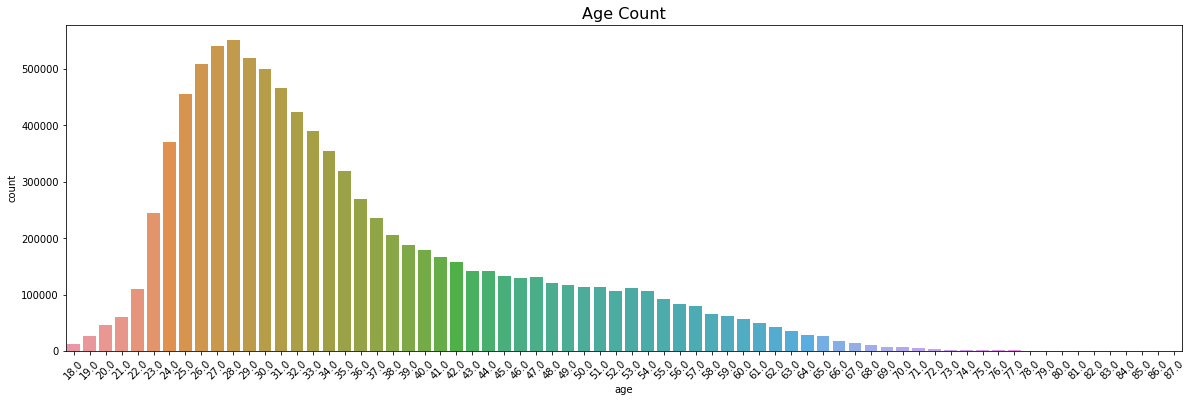

In [17]:
# Age Plot
fig = plt.figure(figsize=(20, 6))
sns.countplot(x='age',data=data)
plt.xticks(rotation=45)
plt.title('Age Count', fontsize=16)

Most of the users are Younger Working-Age (18-44), followed by users of Older Working-Age(45-64) and Retirement Age (>=65). However, people of Retirement Age have longer trip duration for each ride.

Text(0,0.5,'Trip Duration (minutes)')

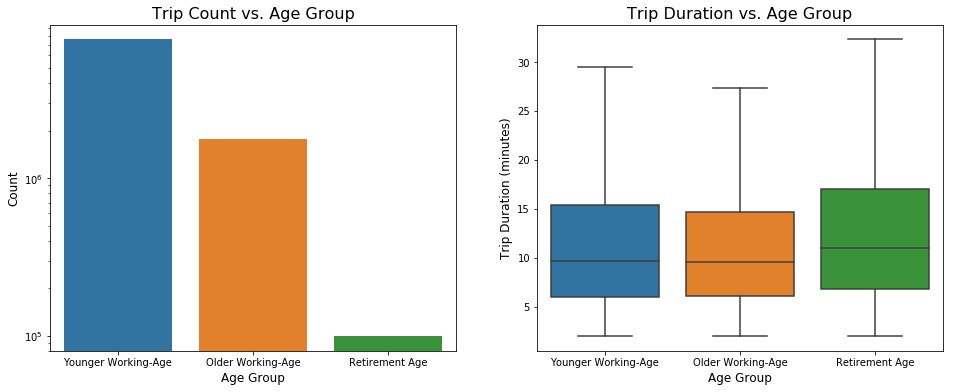

In [18]:
# Trip Count and Trip Duration vs Age Group
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='age_group', data=data, ax=ax[0])
ax[0].set_title('Trip Count vs. Age Group', fontsize=16)
ax[0].set_xlabel('Age Group', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_yscale('log')

sns.boxplot(x='age_group', y='tripduration', data=data, showfliers=False, ax=ax[1])
ax[1].set_title('Trip Duration vs. Age Group', fontsize=16)
ax[1].set_xlabel('Age Group', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)

There are more male users than female, but females have longer average trip duration.

Text(0,0.5,'Trip Duration (minutes)')

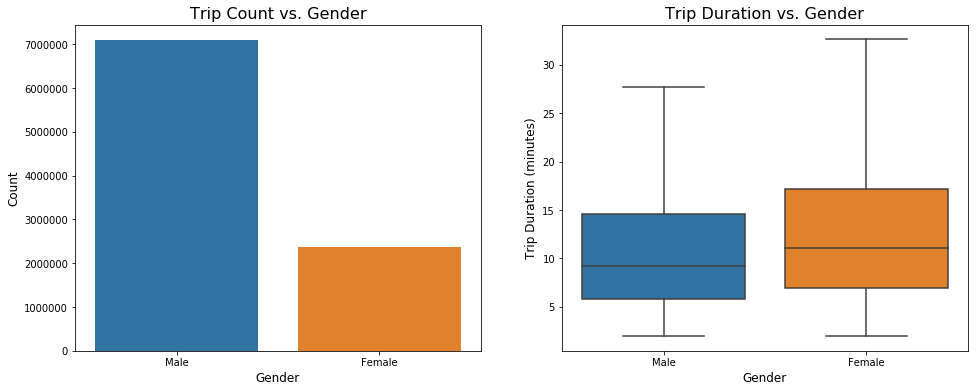

In [19]:
# Trip Count and Trip Duration vs Gender
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='gender', data=data, ax=ax[0])
ax[0].set_title('Trip Count vs. Gender', fontsize=16)
ax[0].set_xlabel('Gender', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='gender', y='tripduration', showfliers=False, data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Gender', fontsize=16)
ax[1].set_xlabel('Gender', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)

Most of the users are Subscribers (with annual membership), and there is only a small percentage of Customers (with 24-hour pass). On average, customers have 15 minutes per ride, while subscribers only have 10 minutes.

Text(0,0.5,'Trip Duration (minutes)')

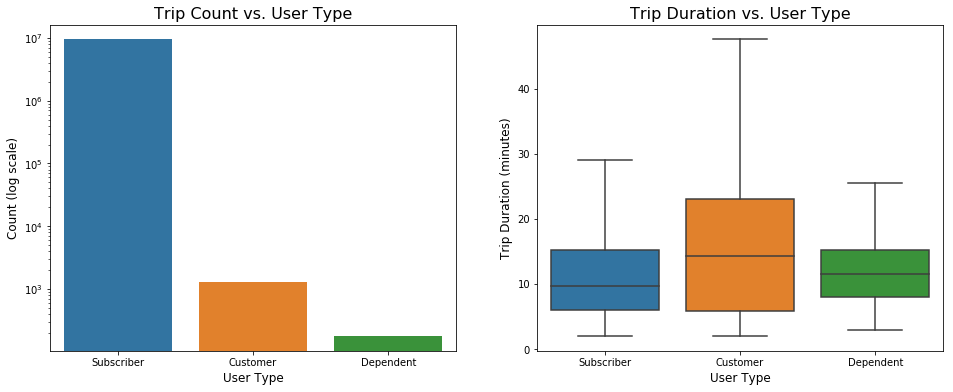

In [20]:
# Trip Count and Trip Duration vs User Type

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='usertype', data=data, ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_title('Trip Count vs. User Type', fontsize=16)
ax[0].set_xlabel('User Type', fontsize=12)
ax[0].set_ylabel('Count (log scale)', fontsize=12)
sns.boxplot(x='usertype', y='tripduration', showfliers=False, data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. User Type', fontsize=16)
ax[1].set_xlabel('User Type', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)

## c) When do they use the sharing bicycles?
The number of trip counts is growing rapidly every year from 2014-2017. But the average trip duration does not change. The 2013 data is excluded here because the service started in June 2013, which makes the trip count significantly small.

Text(0,0.5,'Trip Duration (minutes)')

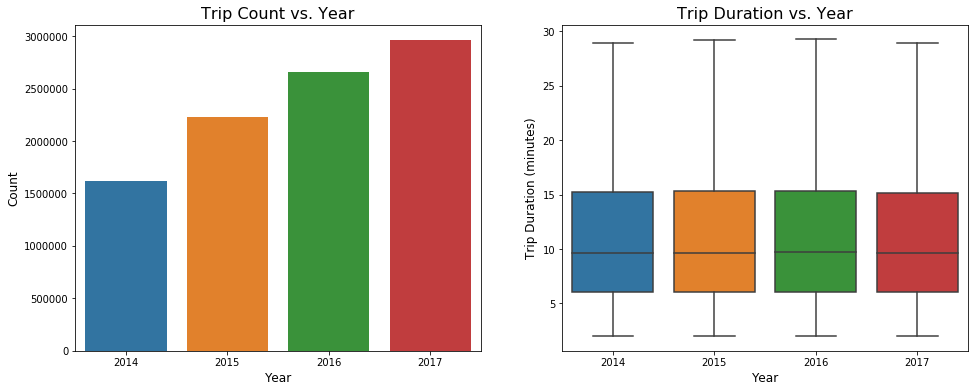

In [21]:
# Trip Count and Trip Duration vs Year
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='year', data=data, ax=ax[0])
ax[0].set_title('Trip Count vs. Year', fontsize=16)
ax[0].set_xlabel('Year', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

sns.boxplot(x='year', y='tripduration', data=data, showfliers=False, ax=ax[1])
ax[1].set_title('Trip Duration vs. Year', fontsize=16)
ax[1].set_xlabel('Year', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)

There are more rides during June, July, Augest, September, and the average trip duration is also longer during those four months.

Text(0,0.5,'Trip Duration (minutes)')

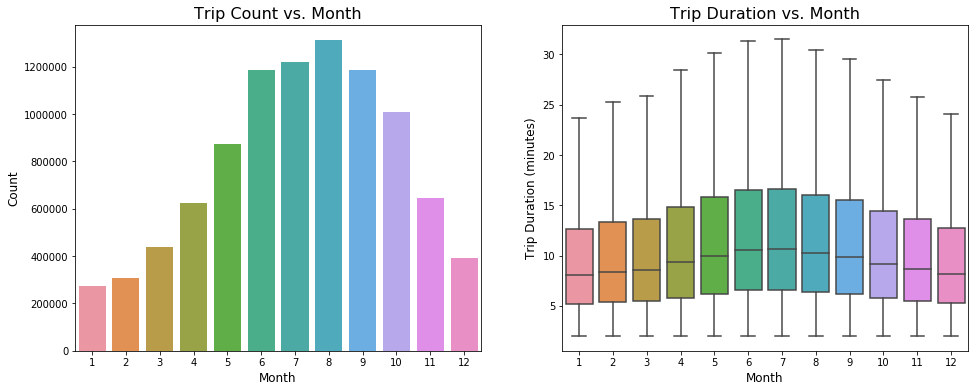

In [22]:
# Trip Count and Trip Duration vs Month
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='month', data=data, ax=ax[0])
ax[0].set_title('Trip Count vs. Month', fontsize=16)
ax[0].set_xlabel('Month', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='month', y='tripduration', showfliers=False, data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Month', fontsize=16)
ax[1].set_xlabel('Month', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)

There are more rides during weekdays, but the average trip duration is longer during weekends.

[Text(0,0,'Mon'),
 Text(0,0,'Tue'),
 Text(0,0,'Wed'),
 Text(0,0,'Thur'),
 Text(0,0,'Fri'),
 Text(0,0,'Sat'),
 Text(0,0,'Sun')]

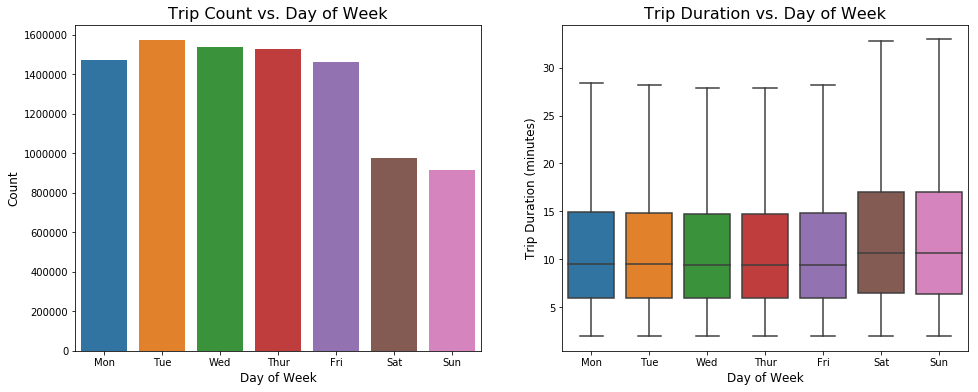

In [24]:
# Day of Week
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='dayofweek', data=data, ax=ax[0])
ax[0].set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
ax[0].set_title('Trip Count vs. Day of Week', fontsize=16)
ax[0].set_xlabel('Day of Week', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='dayofweek', y='tripduration', showfliers=False, data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Day of Week', fontsize=16)
ax[1].set_xlabel('Day of Week', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
ax[1].set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))

We can see that the ride behaviors are totally different between weekdays and weekends. During weekdays, most rides happen between 7-8 or between 16-18. While during weekends, most rides happen between 8-20 with no sharp peak.

In [23]:
weekdaydata=datawith2013[datawith2013['dayofweek']<=5]
weekenddata=datawith2013[datawith2013['dayofweek']>5]

Text(0,0.5,'Trip Duration (minutes)')

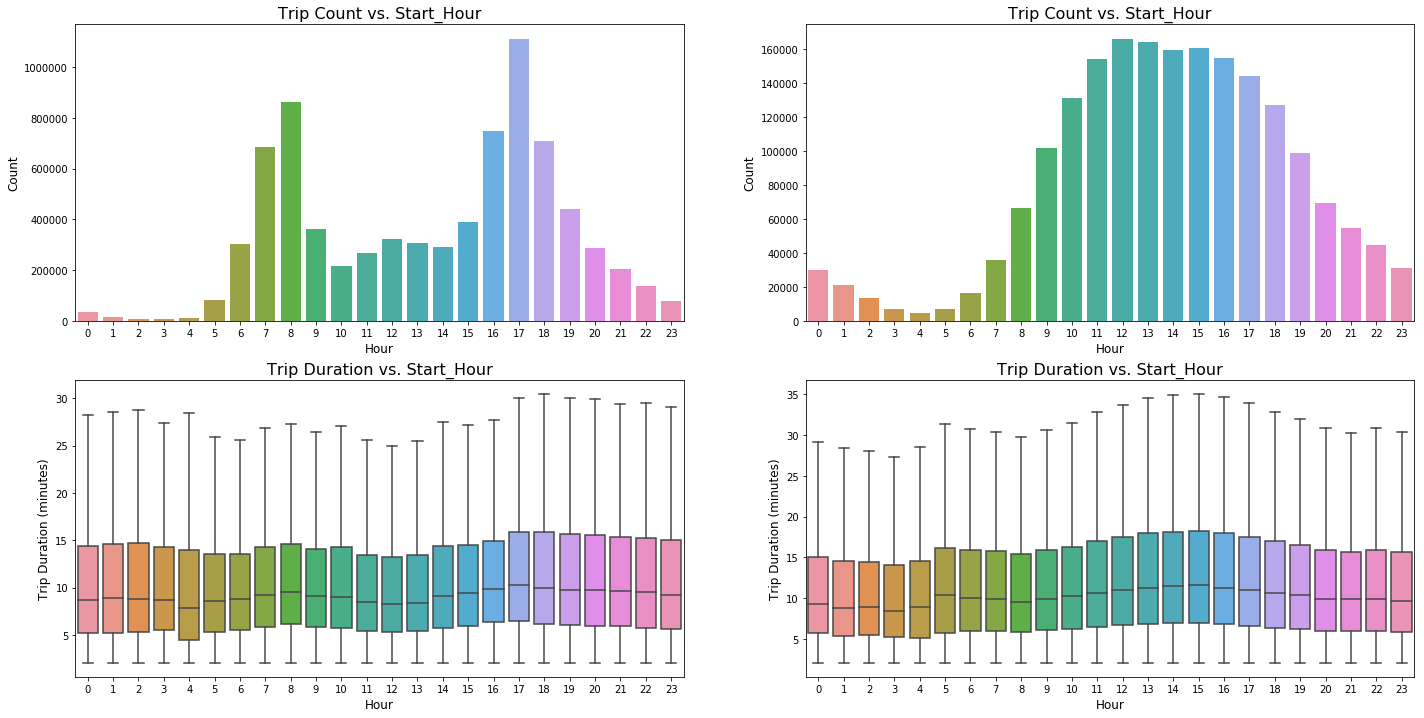

In [28]:
# 24 hours
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
sns.countplot(x='start_hour', data=weekdaydata, ax=ax[0,0])
ax[0,0].set_title('Trip Count vs. Start_Hour', fontsize=16)
ax[0,0].set_xlabel('Hour', fontsize=12)
ax[0,0].set_ylabel('Count', fontsize=12)

sns.countplot(x='start_hour', data=weekenddata, ax=ax[0,1])
ax[0,1].set_title('Trip Count vs. Start_Hour', fontsize=16)
ax[0,1].set_xlabel('Hour', fontsize=12)
ax[0,1].set_ylabel('Count', fontsize=12)

sns.boxplot(x='start_hour', y='tripduration', showfliers=False, data=weekdaydata, ax=ax[1,0])
ax[1,0].set_title('Trip Duration vs. Start_Hour', fontsize=16)
ax[1,0].set_xlabel('Hour', fontsize=12)
ax[1,0].set_ylabel('Trip Duration (minutes)', fontsize=12)

sns.boxplot(x='start_hour', y='tripduration', showfliers=False, data=weekenddata, ax=ax[1,1])
ax[1,1].set_title('Trip Duration vs. Start_Hour', fontsize=16)
ax[1,1].set_xlabel('Hour', fontsize=12)
ax[1,1].set_ylabel('Trip Duration (minutes)', fontsize=12)

The average trip count per day has no obvious difference between sunny and rainy days, showing that there are more total trips on sunny days merely because there are more sunny days.

In [29]:
raindate = data.reset_index()[['year', 'month', 'day','bool_rain']]
raindate = raindate.groupby(['year', 'month', 'day']).max()
raininfo=pd.DataFrame(raindate['bool_rain'].value_counts()).rename(columns={'bool_rain':'numofday'})

raintrip = data.reset_index()[['trip_id','bool_rain']]
raininfo['numoftrip'] = raintrip.groupby(['bool_rain']).count()
raininfo['ratio']=raininfo['numoftrip']/raininfo['numofday']
raininfo.reset_index(inplace=True)

Text(0,0.5,'Daily Ride Counts')

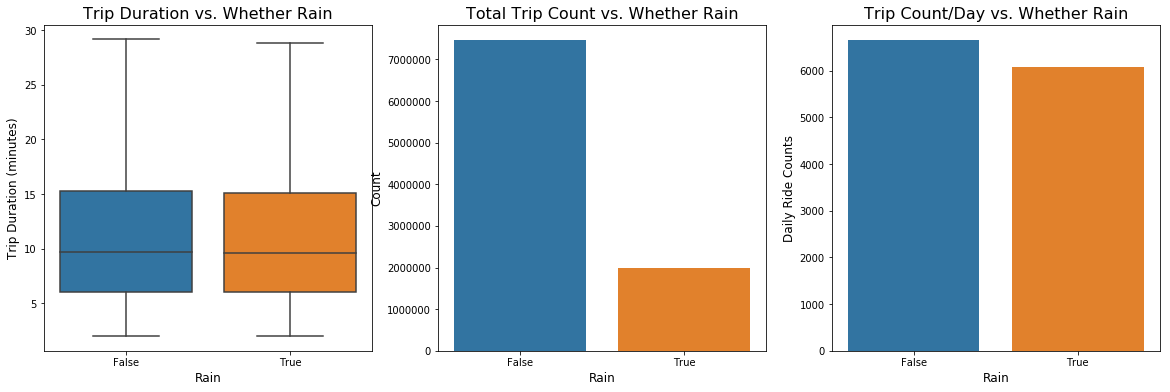

In [30]:
# Weather
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.boxplot(x='bool_rain', y='tripduration', showfliers=False, data=data, ax=ax[0])
ax[0].set_title('Trip Duration vs. Whether Rain', fontsize=16)
ax[0].set_xlabel('Rain', fontsize=12)
ax[0].set_ylabel('Trip Duration (minutes)', fontsize=12)


sns.countplot(x='bool_rain', data=data, ax=ax[1])
ax[1].set_title('Total Trip Count vs. Whether Rain', fontsize=16)
ax[1].set_xlabel('Rain', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)

sns.barplot(x='index',y='ratio', data=raininfo,ax=ax[2])
ax[2].set_title('Trip Count/Day vs. Whether Rain', fontsize=16)
ax[2].set_xlabel('Rain', fontsize=12)
ax[2].set_ylabel('Daily Ride Counts', fontsize=12)

The following graph shows that there are more rides during 18-29 degrees Celsius. That's why June-September stand out in the previous graph. 

In [31]:
data['avg_temp']=(data['TMAX']+data['TMIN'])/2
data['avg_temp']=np.rint(data['avg_temp'])

tempdate = data.reset_index()[['year', 'month', 'day','avg_temp']]
tempdate = tempdate.groupby(['year', 'month', 'day']).max()
tempinfo=pd.DataFrame(tempdate['avg_temp'].value_counts()).rename(columns={'avg_temp':'numofday'})

temptrip = data.reset_index()[['trip_id','avg_temp']]
tempinfo['numoftrip']= temptrip.groupby(['avg_temp']).count()

tempinfo['ratio']=tempinfo['numoftrip']/tempinfo['numofday']
tempinfo.reset_index(inplace=True)

Text(0.5,1,'Trip Count vs. Average Temperature')

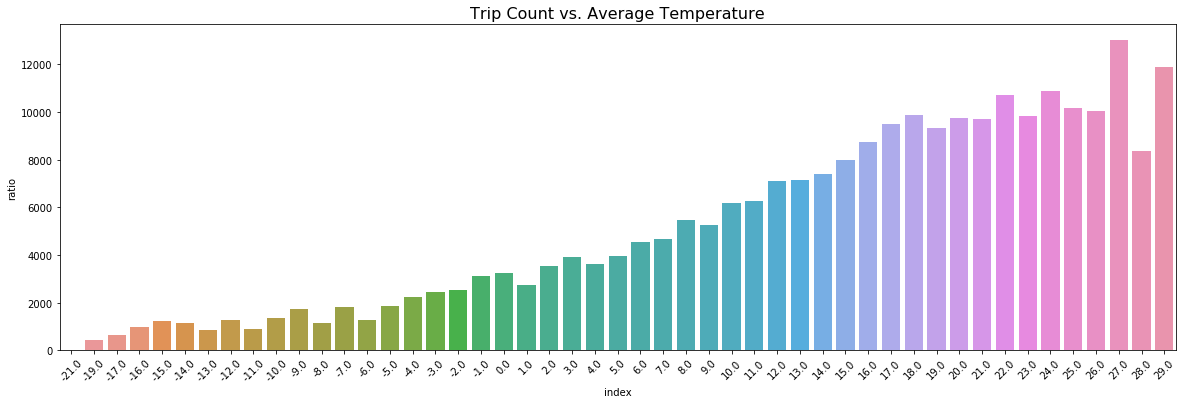

In [154]:
fig = plt.figure(figsize=(20, 6))
sns.barplot(x='index',y='ratio', data=tempinfo)
plt.xticks(rotation=45)
plt.title('Trip Count vs. Average Temperature', fontsize=16)

# 3. Analysis
Now we want to analyze the data in more details. We want to see whether there are any trends during 2013-2017. 

## a) preprocess data into annual data sets for 2013-2017

In [34]:
#data.drop(columns=['avg_temp','diff_temp'],inplace=True)
data2013=(datawith2013[datawith2013['year']==2013]).copy()
data2014=(data[data['year']==2014]).copy()
data2015=(data[data['year']==2015]).copy()
data2016=(data[data['year']==2016]).copy()
data2017=(data[data['year']==2017]).copy()

In [68]:
df_list=['data2013','data2014','data2015','data2016','data2017']

In [36]:
# export the datasets for 2013-2017
dataframes =[data2013, data2014, data2015, data2016, data2017]
years = [2013, 2014, 2015, 2016, 2017]
for df ,year in zip(dataframes,years):
    path = './data/toplot/data' + str(year) + '.csv'
    if os.path.isfile(path):
        continue
    df.to_csv(path, index=True)

In [75]:
# 5 datasets for the start stations information for each trip
start_df_list=['start2013','start2014','start2015','start2016','start2017']

for x,df in zip(start_df_list,df_list):
    exec(x + "=pd.DataFrame("+df+"[['year', 'month', 'day', 'dayofweek', 'start_hour','tripduration',\
    'usertype','gender','from_station_id','from_station_name',\
    'latitude_start', 'longitude_start','dpcapacity_start','age', 'age_group']],copy=True)")

In [76]:
# 5 datasets for the end stations information for each trip
end_df_list=['end2013','end2014','end2015','end2016','end2017']

for x,df in zip(end_df_list,df_list):
    exec(x + "=pd.DataFrame("+df+"[['year', 'month', 'day', 'dayofweek', 'end_hour','tripduration',\
    'usertype','gender','to_station_id','to_station_name',\
    'latitude_end', 'longitude_end','dpcapacity_end','age', 'age_group']],copy=True)")

In [79]:
# export those 10 datasets
start_dataframes =[start2013, start2014, start2015, start2016, start2017]
end_dataframes =[end2013, end2014, end2015, end2016, end2017]
for df ,year in zip(start_dataframes,start_df_list):
    path = './data/toplot/' + str(year) + '.csv'
    if os.path.isfile(path):
        continue
    df.to_csv(path, index=True)
    
for df ,year in zip(end_dataframes,end_df_list):
    path = './data/toplot/' + str(year) + '.csv'
    if os.path.isfile(path):
        continue
    df.to_csv(path, index=True)

In [80]:
# rename columns for later use
start_col={'start_hour':'hour',
           'from_station_id':'station_id',
           'from_station_name':"station_name",
           'latitude_start':'latitude',
           'longitude_start':'longitude',
           'dpcapacity_start':'dpcapacity'}

end_col={'end_hour':'hour',
         'to_station_id':'station_id',
         'to_station_name':"station_name",
         'latitude_end':'latitude',
         'longitude_end':'longitude',
         'dpcapacity_end':'dpcapacity'}
for df in start_dataframes:
    df.rename(columns=start_col,inplace=True)
for df in end_dataframes:
    df.rename(columns=end_col,inplace=True)

## b) Analysis for weekdays
According to the descriptive plotting above, most rides during weekdays happen at 7-8 or 16-18. I seperate times into three groups:
* 7-8,
* 16-18,
* other,

then count the total number of arrival rides and departure rides in each group for each station. 

For each station, serving as either an arrival station or departure station, it may fall into the following 5 groups:
* 'both' means the total number of rides ranks among the top 10% for both 7-8 and 16-18,
* '7-8' means the total number of rides ranks among the top 10% for 7-8, but not for 16-18,
* '16-18' means the total number of rides ranks among the top 10% for 16-18, but not for 7-8,
* 'other' means the total number of rides ranks among the top 10% for other time, but not for 7-8 or 16-18,
* 'un-popular' denotes the rest cases, maybe a better name for this in later version.

For example, a station with arrival type being '16-18' and departure type being 'both' means that it is popular during 16-18 as an arrival station, and is popular during both 7-8 and 16-18 as a departure station.

In [89]:
def whichday(dayofweek):
    if dayofweek<=5:
        return 'Weekday'
    else:
        return 'Weekend'
def when(hour):
    if (hour>=7) and (hour<=8):
        return '7-8'
    elif (hour>=16) and (hour<=18):
        return '16-18'
    else:
        return 'other'
def popular_time(row,df):
    pm=row[0]
    am=row[1]
    other=row[2]
    thresh=0.1*df.shape[0]
    if (am<=thresh) and (pm<=thresh):
        return 'both'
    elif (am<=thresh):
        return '7-8'
    elif (pm<=thresh):
        return '16-18'
    elif (other<=thresh):
        return 'other'
    else:
        return 'un-popular'
    
# for whole day, both weekday and weekend
def popular_wholeday(row,df):
    if row<=0.1*df.shape[0]:
        return 'popular'
    elif row>=0.9*df.shape[0]:
        return 'unpopular'
    else:
        return 'normal'

In [91]:
# returns popular time type for each station during weekdays
# among 'both', '7-8', '16-18', 'other', 'un-popular'
def weekday_rank(df):
    df_1 = pd.DataFrame(df[['station_id','year','hour','dayofweek']],copy=True)
    df_1['dayofweek']=df_1['dayofweek'].apply(lambda x:whichday(x))
    df_1['hour']=df_1['hour'].apply(lambda x:when(x))
    df_3=df_1.pivot_table(values='year',index='station_id',columns=['dayofweek','hour'],aggfunc='count')
    df_3.fillna(0,inplace=True)
    df_3=df_3['Weekday']
    df_5=df_3.rank(axis=0,ascending=False,method='max')
    df_7=pd.DataFrame(df_5[['16-18','7-8','other']].apply(lambda row:popular_time(row,df_5),axis=1))
    df_7.rename(columns={0:'popularity'},inplace=True)
    return df_7

# returns the wholeday popularity type for each station during weekdays
# 'popular' for top 10%, and 'unpopular' for bottom 10%
def weekday_wholeday_rank(df):
    df_1 = pd.DataFrame(df[['station_id','year','dayofweek']],copy=True)
    df_1['dayofweek']=df_1['dayofweek'].apply(lambda x:whichday(x))
    df_3=df_1.pivot_table(values='year',index='station_id',columns=['dayofweek'],aggfunc='count')
    df_3.fillna(0,inplace=True)
    df_3=df_3['Weekday']
    df_5=df_3.rank(axis=0,ascending=False,method='max')
    df_7=pd.DataFrame(df_5.apply(lambda row:popular_wholeday(row,df_5)))
    df_7.rename(columns={0:'popularity'},inplace=True)
    return df_7

# returns the wholeday popularity type for each station during weekends
# 'popular' for top 10%, and 'unpopular' for bottom 10%
def weekend_wholeday_rank(df):
    df_1 = pd.DataFrame(df[['station_id','year','dayofweek']],copy=True)
    df_1['dayofweek']=df_1['dayofweek'].apply(lambda x:whichday(x))
    df_3=df_1.pivot_table(values='year',index='station_id',columns=['dayofweek'],aggfunc='count')
    df_3.fillna(0,inplace=True)
    df_3=df_3['Weekend']
    df_5=df_3.rank(axis=0,ascending=False,method='max')
    df_7=pd.DataFrame(df_5.apply(lambda row:popular_wholeday(row,df_5)))
    df_7.rename(columns={0:'popularity'},inplace=True)
    return df_7

# returns a crosstable for the count of stations with popular types being from 5 groups
# serving as an arrival or a departure station
def weekday_rank_table(df1,df2):
    df_pop_start=weekday_rank(df1)
    df_pop_end=weekday_rank(df2)
    df_pop=df_pop_start.join(df_pop_end,lsuffix='_out',rsuffix='_in')
    return df_pop.reset_index().pivot_table(index='popularity_out',columns='popularity_in',aggfunc='count')

In [92]:
# returns list of station with pattern=case during weekday
def classification(dfstart,dfend,case):
    # case[0]=out_type, case[1]=in_type
    df_1=weekday_rank(dfstart)
    df_2=weekday_rank(dfend)
    # start=out
    out_list=set(df_1.index[df_1['popularity']==case[1]])
    # end=in
    in_list=set(df_2.index[df_2['popularity']==case[0]])
    return out_list.intersection(in_list)

# returns list of unpopular station during weekday
def detect_unpopularity(dfstart,dfend):
    df_1=weekday_wholeday_rank(dfstart)
    df_2=weekday_wholeday_rank(dfend)
    # start=out
    out_list=set(df_1.index[df_1['Weekday']=='unpopular'])
    # end=in
    in_list=set(df_2.index[df_2['Weekday']=='unpopular'])
    return out_list.intersection(in_list)

# returns list of popular station during weekend
def detect_popularity(df):
    df_1=weekend_wholeday_rank(df)
    pop_list=set(df_1.index[df_1['Weekend']=='popular'])
    return pop_list

The following tables show that, during 2013 to 2017, most (by counts) of the popular stations falling into 5 cells corresponding to the following 5 situations

| Types         | Popular Out Time | Popular In Time  | Possible Explaination|
| ------------- |------------------| -----------------|----------------------|
| Type_A        | '16-18'          | '7-8'            | To Be Filled         |
| Type_B        | '7-8'            |  '16-19'         | To Be Filled         |
| Type_C        | '7-8'            |  'un-popular'    | To Be Filled         |
| Type_D        | 'both'           |  'both'          | To Be Filled         |
| Type_E        | 'un-popular'     |  '16-19'         | To Be Filled         |

In [93]:
weekday_rank_table(start2013,end2013)

station_id                            
popularity_in       16-18   7-8 both other un-popular
popularity_out                                       
16-18                 1.0  12.0  4.0   1.0        NaN
7-8                  11.0   NaN  2.0   NaN        5.0
both                  2.0   2.0  8.0   NaN        NaN
other                 NaN   1.0  NaN   NaN        NaN
un-popular            2.0   1.0  NaN   NaN      248.0

In [94]:
weekday_rank_table(start2014,end2014)

station_id                      
popularity_in       16-18   7-8 both un-popular
popularity_out                                 
16-18                 1.0  15.0  NaN        NaN
7-8                  13.0   NaN  NaN        3.0
both                  1.0   5.0  8.0        NaN
other                 2.0   NaN  NaN        NaN
un-popular            5.0   2.0  NaN      245.0

In [95]:
weekday_rank_table(start2015,end2015)

station_id                             
popularity_in       16-18   7-8  both other un-popular
popularity_out                                        
16-18                 1.0  22.0   2.0   1.0        NaN
7-8                  15.0   1.0   NaN   NaN       10.0
both                  3.0   4.0  14.0   NaN        NaN
other                 2.0   NaN   NaN   1.0        NaN
un-popular           10.0   4.0   NaN   NaN      385.0

In [96]:
weekday_rank_table(start2016,end2016)

station_id                             
popularity_in       16-18   7-8  both other un-popular
popularity_out                                        
16-18                 3.0  24.0   5.0   NaN        1.0
7-8                  23.0   1.0   NaN   NaN        9.0
both                  4.0   6.0  14.0   NaN        NaN
other                 2.0   NaN   NaN   2.0        NaN
un-popular            6.0   7.0   NaN   NaN      472.0

In [97]:
weekday_rank_table(start2017,end2017)

station_id                             
popularity_in       16-18   7-8  both other un-popular
popularity_out                                        
16-18                 3.0  28.0   3.0   1.0        1.0
7-8                  23.0   2.0   NaN   NaN       11.0
both                  3.0   4.0  15.0   NaN        NaN
other                 4.0   NaN   1.0   NaN        1.0
un-popular            6.0   5.0   NaN   NaN      473.0

## c) Split the annual datasets into Type_A-Type_E, along with a Type_F (indicating unpopular stations) for later ploting use

In [98]:
# generate the list of stations for each year
# only keep the 'station_id','station_name','latitude','longitude','dpcapacity' information
station2013=start2013[['station_id','station_name','latitude','longitude','dpcapacity']].drop_duplicates(subset='station_id')
station2014=start2014[['station_id','station_name','latitude','longitude','dpcapacity']].drop_duplicates(subset='station_id')
station2015=start2015[['station_id','station_name','latitude','longitude','dpcapacity']].drop_duplicates(subset='station_id')
station2016=start2016[['station_id','station_name','latitude','longitude','dpcapacity']].drop_duplicates(subset='station_id')
station2017=start2017[['station_id','station_name','latitude','longitude','dpcapacity']].drop_duplicates(subset='station_id')

In [118]:
# list of 5 types of stations during weekday
type_A_2013=classification(start2013,end2013,['7-8','16-18'])
type_A_2014=classification(start2014,end2014,['7-8','16-18'])
type_A_2015=classification(start2015,end2015,['7-8','16-18'])
type_A_2016=classification(start2016,end2016,['7-8','16-18'])
type_A_2017=classification(start2017,end2017,['7-8','16-18'])

type_B_2013=classification(start2013,end2013,['16-18','7-8'])
type_B_2014=classification(start2014,end2014,['16-18','7-8'])
type_B_2015=classification(start2015,end2015,['16-18','7-8'])
type_B_2016=classification(start2016,end2016,['16-18','7-8'])
type_B_2017=classification(start2017,end2017,['16-18','7-8'])

type_C_2013=classification(start2013,end2013,['un-popular','7-8'])
type_C_2014=classification(start2014,end2014,['un-popular','7-8'])
type_C_2015=classification(start2015,end2015,['un-popular','7-8'])
type_C_2016=classification(start2016,end2016,['un-popular','7-8'])
type_C_2017=classification(start2017,end2017,['un-popular','7-8'])

type_D_2013=classification(start2013,end2013,['both','both'])
type_D_2014=classification(start2014,end2014,['both','both'])
type_D_2015=classification(start2015,end2015,['both','both'])
type_D_2016=classification(start2016,end2016,['both','both'])
type_D_2017=classification(start2017,end2017,['both','both'])

type_E_2013=classification(start2013,end2013,['16-18','un-popular'])
type_E_2014=classification(start2014,end2014,['16-18','un-popular'])
type_E_2015=classification(start2015,end2015,['16-18','un-popular'])
type_E_2016=classification(start2016,end2016,['16-18','un-popular'])
type_E_2017=classification(start2017,end2017,['16-18','un-popular'])

In [119]:
# unpopulat stations (bottom 10%) during weekday defined as type F
type_F_2013=detect_unpopularity(start2013,end2013)
type_F_2014=detect_unpopularity(start2014,end2014)
type_F_2015=detect_unpopularity(start2015,end2015)
type_F_2016=detect_unpopularity(start2016,end2016)
type_F_2017=detect_unpopularity(start2017,end2017)

In [120]:
# list of popular out/in stations during weekend
Weekend_out_2013=detect_popularity(start2013)
Weekend_out_2014=detect_popularity(start2014)
Weekend_out_2015=detect_popularity(start2015)
Weekend_out_2016=detect_popularity(start2016)
Weekend_out_2017=detect_popularity(start2017)


Weekend_in_2013=detect_popularity(end2013)
Weekend_in_2014=detect_popularity(end2014)
Weekend_in_2015=detect_popularity(end2015)
Weekend_in_2016=detect_popularity(end2016)
Weekend_in_2017=detect_popularity(end2017)

In [121]:
# trip count function for '7-8','16-18','other' during weekdays
def weekday_trip_count(df):
    df_1 = pd.DataFrame(df[['station_id','year','hour','dayofweek']],copy=True)
    df_1['dayofweek']=df_1['dayofweek'].apply(lambda x:whichday(x))
    df_1['hour']=df_1['hour'].apply(lambda x:when(x))
    df_3=df_1.pivot_table(values='year',index='station_id',columns=['dayofweek','hour'],aggfunc='count')
    df_3.fillna(0,inplace=True)
    df_3=df_3['Weekday']
    return df_3

# trip count function for wholeday during weekdays
def weekday_wholeday_count(df):
    df_1 = pd.DataFrame(df[['station_id','year','dayofweek']],copy=True)
    df_1['dayofweek']=df_1['dayofweek'].apply(lambda x:whichday(x))
    df_3=df_1.pivot_table(values='year',index='station_id',columns=['dayofweek'],aggfunc='count')
    df_3.fillna(0,inplace=True)
    df_3=df_3['Weekday']
    return df_3

# trip count function for wholeday during weekdays
def weekend_wholeday_count(df):
    df_1 = pd.DataFrame(df[['station_id','year','dayofweek']],copy=True)
    df_1['dayofweek']=df_1['dayofweek'].apply(lambda x:whichday(x))
    df_3=df_1.pivot_table(values='year',index='station_id',columns=['dayofweek'],aggfunc='count')
    df_3.fillna(0,inplace=True)
    df_3=df_3['Weekend']
    return df_3

In [122]:
# dataframes for the number of trip counts in '7-8','16-18','other' 
# for each station during weekdays, as a start or an end station
weekday_start_2013=weekday_trip_count(start2013)
weekday_start_2014=weekday_trip_count(start2014)
weekday_start_2015=weekday_trip_count(start2015)
weekday_start_2016=weekday_trip_count(start2016)
weekday_start_2017=weekday_trip_count(start2017)

weekday_end_2013=weekday_trip_count(end2013)
weekday_end_2014=weekday_trip_count(end2014)
weekday_end_2015=weekday_trip_count(end2015)
weekday_end_2016=weekday_trip_count(end2016)
weekday_end_2017=weekday_trip_count(end2017)

In [158]:
weekday_start_2013.head()

hour        16-18    7-8   other
station_id                      
5           454.0  519.0  1059.0
13          538.0  113.0   883.0
14          101.0  126.0   272.0
15           57.0  224.0   397.0
16          105.0  257.0   255.0

In [123]:
# dataframes for the number of total trip counts for each station during weekdays, as a start or an end station
weekday_wholeday_start_2013=weekday_wholeday_count(start2013)
weekday_wholeday_start_2014=weekday_wholeday_count(start2014)
weekday_wholeday_start_2015=weekday_wholeday_count(start2015)
weekday_wholeday_start_2016=weekday_wholeday_count(start2016)
weekday_wholeday_start_2017=weekday_wholeday_count(start2017)

weekday_wholeday_end_2013=weekday_wholeday_count(end2013)
weekday_wholeday_end_2014=weekday_wholeday_count(end2014)
weekday_wholeday_end_2015=weekday_wholeday_count(end2015)
weekday_wholeday_end_2016=weekday_wholeday_count(end2016)
weekday_wholeday_end_2017=weekday_wholeday_count(end2017)

In [157]:
weekday_wholeday_start_2013.head()

station_id
5     2032
13    1534
14     499
15     678
16     617
Name: Weekday, dtype: int64

In [124]:
# dataframes for the number of total trip counts for each station during weekends, as a start or an end station
weekend_wholeday_start_2013=weekend_wholeday_count(start2013)
weekend_wholeday_start_2014=weekend_wholeday_count(start2014)
weekend_wholeday_start_2015=weekend_wholeday_count(start2015)
weekend_wholeday_start_2016=weekend_wholeday_count(start2016)
weekend_wholeday_start_2017=weekend_wholeday_count(start2017)

weekend_wholeday_end_2013=weekend_wholeday_count(end2013)
weekend_wholeday_end_2014=weekend_wholeday_count(end2014)
weekend_wholeday_end_2015=weekend_wholeday_count(end2015)
weekend_wholeday_end_2016=weekend_wholeday_count(end2016)
weekend_wholeday_end_2017=weekend_wholeday_count(end2017)

In [156]:
weekend_wholeday_start_2013.head()

station_id
5     409
13    577
14    155
15    199
16    209
Name: Weekend, dtype: int64

In [125]:
# weekday datasets from type_A-type_F stations for each year, not including trip counts
station_A_2013=station2013[station2013['station_id'].apply(lambda x:x in type_A_2013)].reset_index(drop=True)
station_A_2014=station2014[station2014['station_id'].apply(lambda x:x in type_A_2014)].reset_index(drop=True)
station_A_2015=station2015[station2015['station_id'].apply(lambda x:x in type_A_2015)].reset_index(drop=True)
station_A_2016=station2016[station2016['station_id'].apply(lambda x:x in type_A_2016)].reset_index(drop=True)
station_A_2017=station2017[station2017['station_id'].apply(lambda x:x in type_A_2017)].reset_index(drop=True)

station_B_2013=station2013[station2013['station_id'].apply(lambda x:x in type_B_2013)].reset_index(drop=True)
station_B_2014=station2014[station2014['station_id'].apply(lambda x:x in type_B_2014)].reset_index(drop=True)
station_B_2015=station2015[station2015['station_id'].apply(lambda x:x in type_B_2015)].reset_index(drop=True)
station_B_2016=station2016[station2016['station_id'].apply(lambda x:x in type_B_2016)].reset_index(drop=True)
station_B_2017=station2017[station2017['station_id'].apply(lambda x:x in type_B_2017)].reset_index(drop=True)

station_C_2013=station2013[station2013['station_id'].apply(lambda x:x in type_C_2013)].reset_index(drop=True)
station_C_2014=station2014[station2014['station_id'].apply(lambda x:x in type_C_2014)].reset_index(drop=True)
station_C_2015=station2015[station2015['station_id'].apply(lambda x:x in type_C_2015)].reset_index(drop=True)
station_C_2016=station2016[station2016['station_id'].apply(lambda x:x in type_C_2016)].reset_index(drop=True)
station_C_2017=station2017[station2017['station_id'].apply(lambda x:x in type_C_2017)].reset_index(drop=True)

station_D_2013=station2013[station2013['station_id'].apply(lambda x:x in type_D_2013)].reset_index(drop=True)
station_D_2014=station2014[station2014['station_id'].apply(lambda x:x in type_D_2014)].reset_index(drop=True)
station_D_2015=station2015[station2015['station_id'].apply(lambda x:x in type_D_2015)].reset_index(drop=True)
station_D_2016=station2016[station2016['station_id'].apply(lambda x:x in type_D_2016)].reset_index(drop=True)
station_D_2017=station2017[station2017['station_id'].apply(lambda x:x in type_D_2017)].reset_index(drop=True)

station_E_2013=station2013[station2013['station_id'].apply(lambda x:x in type_E_2013)].reset_index(drop=True)
station_E_2014=station2014[station2014['station_id'].apply(lambda x:x in type_E_2014)].reset_index(drop=True)
station_E_2015=station2015[station2015['station_id'].apply(lambda x:x in type_E_2015)].reset_index(drop=True)
station_E_2016=station2016[station2016['station_id'].apply(lambda x:x in type_E_2016)].reset_index(drop=True)
station_E_2017=station2017[station2017['station_id'].apply(lambda x:x in type_E_2017)].reset_index(drop=True)

station_F_2013=station2013[station2013['station_id'].apply(lambda x:x in type_F_2013)].reset_index(drop=True)
station_F_2014=station2014[station2014['station_id'].apply(lambda x:x in type_F_2014)].reset_index(drop=True)
station_F_2015=station2015[station2015['station_id'].apply(lambda x:x in type_F_2015)].reset_index(drop=True)
station_F_2016=station2016[station2016['station_id'].apply(lambda x:x in type_F_2016)].reset_index(drop=True)
station_F_2017=station2017[station2017['station_id'].apply(lambda x:x in type_F_2017)].reset_index(drop=True)

In [126]:
# a merge function for including the trip_counts
def station_type_trip_count(dfstation_type,dfstart,dfend):
    return (dfstation_type.set_index('station_id')).join(dfstart).join(dfend,lsuffix='_out',rsuffix='_in')

In [127]:
# weekday from type_A-type_F stations for each year, including trip counts
station_A_2013=station_type_trip_count(station_A_2013,weekday_start_2013,weekday_end_2013)
station_A_2014=station_type_trip_count(station_A_2014,weekday_start_2014,weekday_end_2014)
station_A_2015=station_type_trip_count(station_A_2015,weekday_start_2015,weekday_end_2015)
station_A_2016=station_type_trip_count(station_A_2016,weekday_start_2016,weekday_end_2016)
station_A_2017=station_type_trip_count(station_A_2017,weekday_start_2017,weekday_end_2017)

station_B_2013=station_type_trip_count(station_B_2013,weekday_start_2013,weekday_end_2013)
station_B_2014=station_type_trip_count(station_B_2014,weekday_start_2014,weekday_end_2014)
station_B_2015=station_type_trip_count(station_B_2015,weekday_start_2015,weekday_end_2015)
station_B_2016=station_type_trip_count(station_B_2016,weekday_start_2016,weekday_end_2016)
station_B_2017=station_type_trip_count(station_B_2017,weekday_start_2017,weekday_end_2017)

station_C_2013=station_type_trip_count(station_C_2013,weekday_start_2013,weekday_end_2013)
station_C_2014=station_type_trip_count(station_C_2014,weekday_start_2014,weekday_end_2014)
station_C_2015=station_type_trip_count(station_C_2015,weekday_start_2015,weekday_end_2015)
station_C_2016=station_type_trip_count(station_C_2016,weekday_start_2016,weekday_end_2016)
station_C_2017=station_type_trip_count(station_C_2017,weekday_start_2017,weekday_end_2017)

station_D_2013=station_type_trip_count(station_D_2013,weekday_start_2013,weekday_end_2013)
station_D_2014=station_type_trip_count(station_D_2014,weekday_start_2014,weekday_end_2014)
station_D_2015=station_type_trip_count(station_D_2015,weekday_start_2015,weekday_end_2015)
station_D_2016=station_type_trip_count(station_D_2016,weekday_start_2016,weekday_end_2016)
station_D_2017=station_type_trip_count(station_D_2017,weekday_start_2017,weekday_end_2017)

station_E_2013=station_type_trip_count(station_E_2013,weekday_start_2013,weekday_end_2013)
station_E_2014=station_type_trip_count(station_E_2014,weekday_start_2014,weekday_end_2014)
station_E_2015=station_type_trip_count(station_E_2015,weekday_start_2015,weekday_end_2015)
station_E_2016=station_type_trip_count(station_E_2016,weekday_start_2016,weekday_end_2016)
station_E_2017=station_type_trip_count(station_E_2017,weekday_start_2017,weekday_end_2017)

station_F_2013=station_type_trip_count(station_F_2013,weekday_start_2013,weekday_end_2013)
station_F_2014=station_type_trip_count(station_F_2014,weekday_start_2014,weekday_end_2014)
station_F_2015=station_type_trip_count(station_F_2015,weekday_start_2015,weekday_end_2015)
station_F_2016=station_type_trip_count(station_F_2016,weekday_start_2016,weekday_end_2016)
station_F_2017=station_type_trip_count(station_F_2017,weekday_start_2017,weekday_end_2017)

In [155]:
station_A_2013.head()

station_name   latitude  longitude  dpcapacity  \
station_id                                                                
52             Michigan Ave & Lake St  41.886058 -87.624289        23.0   
90                    Millennium Park  41.881032 -87.624084        35.0   
31          Franklin St & Chicago Ave  41.896802 -87.635638        23.0   
51             Clark St & Randolph St  41.884576 -87.631890        31.0   
37             Dearborn St & Adams St  41.879356 -87.629791        19.0   

            16-18_out  7-8_out  other_out  16-18_in  7-8_in  other_in  
station_id                                                             
52             2538.0    222.0     1820.0     499.0  2098.0    2125.0  
90             1000.0    241.0     1351.0     565.0   737.0    1417.0  
31             1240.0    388.0     1249.0     571.0  1004.0    1375.0  
51             1915.0    411.0     2164.0     623.0  1359.0    2532.0  
37             2261.0    228.0     2215.0     361.0  1723.0    2108.0

In [128]:
# weekend datasets for popular out/in stations for each year, not including trip counts
weekend_station_out_2013=station2013[station2013['station_id'].apply(lambda x:x in Weekend_out_2013)].reset_index(drop=True)
weekend_station_out_2014=station2014[station2014['station_id'].apply(lambda x:x in Weekend_out_2014)].reset_index(drop=True)
weekend_station_out_2015=station2015[station2015['station_id'].apply(lambda x:x in Weekend_out_2015)].reset_index(drop=True)
weekend_station_out_2016=station2016[station2016['station_id'].apply(lambda x:x in Weekend_out_2016)].reset_index(drop=True)
weekend_station_out_2017=station2017[station2017['station_id'].apply(lambda x:x in Weekend_out_2017)].reset_index(drop=True)


weekend_station_in_2013=station2013[station2013['station_id'].apply(lambda x:x in Weekend_in_2013)].reset_index(drop=True)
weekend_station_in_2014=station2014[station2014['station_id'].apply(lambda x:x in Weekend_in_2014)].reset_index(drop=True)
weekend_station_in_2015=station2015[station2015['station_id'].apply(lambda x:x in Weekend_in_2015)].reset_index(drop=True)
weekend_station_in_2016=station2016[station2016['station_id'].apply(lambda x:x in Weekend_in_2016)].reset_index(drop=True)
weekend_station_in_2017=station2017[station2017['station_id'].apply(lambda x:x in Weekend_in_2017)].reset_index(drop=True)

In [129]:
# weekend datasets for popular out/in stations for each year, including trip counts
weekend_station_out_2013=station_type_trip_count(weekend_station_out_2013,weekend_wholeday_start_2013,weekend_wholeday_end_2013)
weekend_station_out_2014=station_type_trip_count(weekend_station_out_2014,weekend_wholeday_start_2014,weekend_wholeday_end_2014)
weekend_station_out_2015=station_type_trip_count(weekend_station_out_2015,weekend_wholeday_start_2015,weekend_wholeday_end_2015)
weekend_station_out_2016=station_type_trip_count(weekend_station_out_2016,weekend_wholeday_start_2016,weekend_wholeday_end_2016)
weekend_station_out_2017=station_type_trip_count(weekend_station_out_2017,weekend_wholeday_start_2017,weekend_wholeday_end_2017)

weekend_station_in_2013=station_type_trip_count(weekend_station_in_2013,weekend_wholeday_start_2013,weekend_wholeday_end_2013)
weekend_station_in_2014=station_type_trip_count(weekend_station_in_2014,weekend_wholeday_start_2014,weekend_wholeday_end_2014)
weekend_station_in_2015=station_type_trip_count(weekend_station_in_2015,weekend_wholeday_start_2015,weekend_wholeday_end_2015)
weekend_station_in_2016=station_type_trip_count(weekend_station_in_2016,weekend_wholeday_start_2016,weekend_wholeday_end_2016)
weekend_station_in_2017=station_type_trip_count(weekend_station_in_2017,weekend_wholeday_start_2017,weekend_wholeday_end_2017)

# 4. Further Analysis Using Interactive Graphs
## a) Flows between living and working areas
From the following graph (two netflows at 8 and at 17, the two peaks during weekdays), we can see a flow of people from living area to working area at 8, and a backward flow at 17, during weekdays. The orange in the graph means a postive net departure, and blue mean negative net departure (in other words, net arrival).

It will become more clear when you look it together with the later type_A-type_E graphs.

In [171]:
locations = data2017.groupby('from_station_id').first()
locations = locations.loc[:,['latitude_start','longitude_start','from_station_name']]

am1 = data2017[data2017["start_hour"]==8]
departure_counts =  am1.groupby("from_station_id").count()
# select one column
departure_counts = departure_counts.iloc[:,[0]]
# and rename that column
departure_counts.columns= ["Departure Count"]

am2 = data2017[data2017["end_hour"]==8]
arrival_counts =  am2.groupby("to_station_id").count()
# select one column
arrival_counts = arrival_counts.iloc[:,[0]]
# and rename that column
arrival_counts.columns= ["Arrival Count"]

trip_counts_8 = locations.join(departure_counts).join(arrival_counts)
trip_counts_8.fillna(0,inplace=True)

In [172]:
pm1 = data2017[data2017["start_hour"]==17]
departure_counts =  pm1.groupby("from_station_id").count()
# select one column
departure_counts = departure_counts.iloc[:,[0]]
# and rename that column
departure_counts.columns= ["Departure Count"]


pm2 = data2017[data2017["end_hour"]==17]
arrival_counts =  pm2.groupby("to_station_id").count()
# select one column
arrival_counts = arrival_counts.iloc[:,[0]]
# and rename that column
arrival_counts.columns= ["Arrival Count"]

trip_counts_17 = locations.join(departure_counts).join(arrival_counts)
trip_counts_17.fillna(0,inplace=True)

In [183]:
folium_map_8_17 = folium.Map(location=[41.88, -87.66],
                        zoom_start=12,
                        max_lat=42.064,min_lat=41.736642,max_lon=-87.54938628,min_lon=-87.802872,
                        width='50%',
                        tiles="CartoDB dark_matter")

feature_group_8 = folium.map.FeatureGroup(name='at 8')

for index, row in trip_counts_8.iterrows():
    net_departures = (row["Departure Count"]-row["Arrival Count"])
    radius = np.log2(np.abs(net_departures)+1)
    if net_departures>0:
        color="#E37222"
    else:
        color="#0A8A9F"
    popup_text = """{}<br>total departures: {}<br> 
                total arrivals: {}<br>net departures: {}"""
    popup_text = popup_text.format(row["from_station_name"],row["Arrival Count"],
                                   row["Departure Count"],net_departures)

    folium.CircleMarker(location=(row["latitude_start"],row["longitude_start"]),radius=radius,color=color,
                        fill=True,popup=popup_text).add_to(feature_group_8)

In [184]:
feature_group_17 = folium.map.FeatureGroup(name='at 17')

for index, row in trip_counts_17.iterrows():
    net_departures = (row["Departure Count"]-row["Arrival Count"])
    radius = np.log2(np.abs(net_departures)+1)
    if net_departures>0:
        color="#E37222" 
    else:
        color="#0A8A9F" 
    popup_text = """{}<br>total departures: {}<br> 
                total arrivals: {}<br>net departures: {}"""
    popup_text = popup_text.format(row["from_station_name"],row["Arrival Count"],
                                   row["Departure Count"],net_departures)

    folium.CircleMarker(location=(row["latitude_start"],row["longitude_start"]),radius=radius,color=color,
                        fill=True,popup=popup_text).add_to(feature_group_17)

feature_group_8.add_to(folium_map_8_17)
feature_group_17.add_to(folium_map_8_17)
folium.LayerControl().add_to(folium_map_8_17)
folium_map_8_17

## b) Expansion and Shifting for the Weekdays Case
As we can see below, the type_A-type_E stations are expanding outward towards the new service areas annually during 2013-2017, while type_F (unpopular) stations are always at the bounds.
### i) Expansion of Type_A stations

In [132]:
folium_map_A = folium.Map(location=[41.88, -87.66],
                          zoom_start=11,
                          max_lat=42.064,min_lat=41.736642,max_lon=-87.54938628,min_lon=-87.802872,
                          width='50%',
                          tiles="CartoDB dark_matter")

In [133]:
Type_A_2013 = folium.map.FeatureGroup(name='Type_A_2013')
for index, row in station_A_2013.iterrows():
    radius = 10
    color=colorscheme[0]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_A_2013)
Type_A_2013.add_to(folium_map_A)

Type_A_2014 = folium.map.FeatureGroup(name='Type_A_2014')
for index, row in station_A_2014.iterrows():
    radius = 13
    color=colorscheme[1]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_A_2014)
Type_A_2014.add_to(folium_map_A)

Type_A_2015 = folium.map.FeatureGroup(name='Type_A_2015')
for index, row in station_A_2015.iterrows():
    radius = 16
    color=colorscheme[2]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_A_2015)
Type_A_2015.add_to(folium_map_A)

Type_A_2016 = folium.map.FeatureGroup(name='Type_A_2016')
for index, row in station_A_2016.iterrows():
    radius = 19
    color=colorscheme[3]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        weight=2,
                        color=color,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_A_2016)
Type_A_2016.add_to(folium_map_A)

Type_A_2017 = folium.map.FeatureGroup(name='Type_A_2017')
for index, row in station_A_2017.iterrows():
    radius = 22
    color=colorscheme[4]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        weight=2,
                        color=color,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_A_2017)
Type_A_2017.add_to(folium_map_A)

folium.LayerControl().add_to(folium_map_A)
folium_map_A

## ii) Expansion of Type_B stations

In [134]:
folium_map_B = folium.Map(location=[41.88, -87.66],
                          zoom_start=11,
                          max_lat=42.064,min_lat=41.736642,max_lon=-87.54938628,min_lon=-87.802872,
                          width='50%',
                          tiles="CartoDB dark_matter")

In [135]:
Type_B_2013 = folium.map.FeatureGroup(name='Type_B_2013')
Type_B_2013 = folium.map.FeatureGroup(name='Type_B_2013')
for index, row in station_B_2013.iterrows():
    radius = 10
    color=colorscheme[0]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_B_2013,)
Type_B_2013.add_to(folium_map_B)

Type_B_2014 = folium.map.FeatureGroup(name='Type_B_2014')
for index, row in station_B_2014.iterrows():
    radius = 10
    color=colorscheme[1]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_B_2014)
Type_B_2014.add_to(folium_map_B)

Type_B_2015 = folium.map.FeatureGroup(name='Type_B_2015')
for index, row in station_B_2015.iterrows():
    radius = 10
    color=colorscheme[2]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_B_2015)
Type_B_2015.add_to(folium_map_B)

Type_B_2016 = folium.map.FeatureGroup(name='Type_B_2016')
for index, row in station_B_2016.iterrows():
    radius = 10
    color=colorscheme[3]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        weight=2,
                        color=color,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_B_2016)
Type_B_2016.add_to(folium_map_B)

Type_B_2017 = folium.map.FeatureGroup(name='Type_B_2017')
for index, row in station_B_2017.iterrows():
    radius = 10
    color=colorscheme[4]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        weight=2,
                        color=color,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_B_2017)
Type_B_2017.add_to(folium_map_B)

folium.LayerControl().add_to(folium_map_B)
folium_map_B

## iii) Expansion of Type_C stations

In [136]:
folium_map_C = folium.Map(location=[41.88, -87.66],
                          zoom_start=11,
                          max_lat=42.064,min_lat=41.736642,max_lon=-87.54938628,min_lon=-87.802872,
                          width='50%',
                          tiles="CartoDB dark_matter")

In [137]:
Type_C_2013 = folium.map.FeatureGroup(name='Type_C_2013')
for index, row in station_C_2013.iterrows():
    radius = 10
    color=colorscheme[0]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_C_2013)
Type_C_2013.add_to(folium_map_C)

Type_C_2014 = folium.map.FeatureGroup(name='Type_C_2014')
for index, row in station_C_2014.iterrows():
    radius = 13
    color=colorscheme[1]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_C_2014)
Type_C_2014.add_to(folium_map_C)

Type_C_2015 = folium.map.FeatureGroup(name='Type_C_2015')
for index, row in station_C_2015.iterrows():
    radius = 16
    color=colorscheme[2]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_C_2015)
Type_C_2015.add_to(folium_map_C)

Type_C_2016 = folium.map.FeatureGroup(name='Type_C_2016')
for index, row in station_C_2016.iterrows():
    radius = 19
    color=colorscheme[3]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        weight=2,
                        color=color,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_C_2016)
Type_C_2016.add_to(folium_map_C)

Type_C_2017 = folium.map.FeatureGroup(name='Type_C_2017')
for index, row in station_C_2017.iterrows():
    radius = 22
    color=colorscheme[4]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        weight=2,
                        color=color,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_C_2017)
Type_C_2017.add_to(folium_map_C)

folium.LayerControl().add_to(folium_map_C)
folium_map_C

## iv) Expansion of Type_D stations

In [138]:
folium_map_D = folium.Map(location=[41.88, -87.66],
                          zoom_start=11,
                          max_lat=42.064,min_lat=41.736642,max_lon=-87.54938628,min_lon=-87.802872,
                          width='50%',
                          tiles="CartoDB dark_matter")

In [139]:
Type_D_2013 = folium.map.FeatureGroup(name='Type_D_2013')
for index, row in station_D_2013.iterrows():
    radius = 10
    color=colorscheme[0]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_D_2013)
Type_D_2013.add_to(folium_map_D)

Type_D_2014 = folium.map.FeatureGroup(name='Type_D_2014')
for index, row in station_D_2014.iterrows():
    radius = 13
    color=colorscheme[1]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_D_2014)
Type_D_2014.add_to(folium_map_D)

Type_D_2015 = folium.map.FeatureGroup(name='Type_D_2015')
for index, row in station_D_2015.iterrows():
    radius = 16
    color=colorscheme[2]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_D_2015)
Type_D_2015.add_to(folium_map_D)

Type_D_2016 = folium.map.FeatureGroup(name='Type_D_2016')
for index, row in station_D_2016.iterrows():
    radius = 19
    color=colorscheme[3]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        weight=2,
                        color=color,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_D_2016)
Type_D_2016.add_to(folium_map_D)

Type_D_2017 = folium.map.FeatureGroup(name='Type_D_2017')
for index, row in station_D_2017.iterrows():
    radius = 22
    color=colorscheme[4]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        weight=2,
                        color=color,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_D_2017)
Type_D_2017.add_to(folium_map_D)

folium.LayerControl().add_to(folium_map_D)
folium_map_D

## v) Expansion of Type_E stations

In [140]:
folium_map_E = folium.Map(location=[41.88, -87.66],
                          zoom_start=11,
                          max_lat=42.064,min_lat=41.736642,max_lon=-87.54938628,min_lon=-87.802872,
                          width='50%',
                          tiles="CartoDB dark_matter")

In [141]:
Type_E_2013 = folium.map.FeatureGroup(name='Type_E_2013')
for index, row in station_E_2013.iterrows():
    radius = 10
    color=colorscheme[0]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_E_2013)
Type_E_2013.add_to(folium_map_E)

Type_E_2014 = folium.map.FeatureGroup(name='Type_E_2014')
for index, row in station_E_2014.iterrows():
    radius = 13
    color=colorscheme[1]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_E_2014)
Type_E_2014.add_to(folium_map_E)

Type_E_2015 = folium.map.FeatureGroup(name='Type_E_2015')
for index, row in station_E_2015.iterrows():
    radius = 16
    color=colorscheme[2]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_E_2015)
Type_E_2015.add_to(folium_map_E)

Type_E_2016 = folium.map.FeatureGroup(name='Type_E_2016')
for index, row in station_E_2016.iterrows():
    radius = 19
    color=colorscheme[3]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        weight=2,
                        color=color,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_E_2016)
Type_E_2016.add_to(folium_map_E)

Type_E_2017 = folium.map.FeatureGroup(name='Type_E_2017')
for index, row in station_E_2017.iterrows():
    radius = 22
    color=colorscheme[4]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        weight=2,
                        color=color,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_E_2017)
Type_E_2017.add_to(folium_map_E)

folium.LayerControl().add_to(folium_map_E)
folium_map_E

## vi) Shifting of Type_F Stations
For type_F (unpopular, bottom 10%) stations, they always locate at the service boundary.

In [142]:
folium_map_F = folium.Map(location=[41.88, -87.66],
                          zoom_start=11,
                          max_lat=42.064,min_lat=41.736642,max_lon=-87.54938628,min_lon=-87.802872,
                          width='50%',
                          tiles="CartoDB dark_matter")

In [143]:
Type_F_2013 = folium.map.FeatureGroup(name='Type_F_2013')
for index, row in station_F_2013.iterrows():
    radius = 10
    color=colorscheme[0]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_F_2013)
Type_F_2013.add_to(folium_map_F)

Type_F_2014 = folium.map.FeatureGroup(name='Type_F_2014')
for index, row in station_F_2014.iterrows():
    radius = 13
    color=colorscheme[1]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_F_2014)
Type_F_2014.add_to(folium_map_F)

Type_F_2015 = folium.map.FeatureGroup(name='Type_F_2015')
for index, row in station_F_2015.iterrows():
    radius = 16
    color=colorscheme[2]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        color=color,
                        weight=2,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_F_2015)
Type_F_2015.add_to(folium_map_F)

Type_F_2016 = folium.map.FeatureGroup(name='Type_F_2016')
for index, row in station_F_2016.iterrows():
    radius = 19
    color=colorscheme[3]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        weight=2,
                        color=color,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_F_2016)
Type_F_2016.add_to(folium_map_F)

Type_F_2017 = folium.map.FeatureGroup(name='Type_F_2017')
for index, row in station_F_2017.iterrows():
    radius = 22
    color=colorscheme[4]
    #popup_text = """{}<br>capacity: {}"""
    #popup_text = popup_text.format(row["station_name"],row["dpcapacity"])

    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        radius=radius,
                        weight=2,
                        color=color,
                        fill=True,
                        popup=row["station_name"]).add_to(Type_F_2017)
Type_F_2017.add_to(folium_map_F)

folium.LayerControl().add_to(folium_map_F)
folium_map_F

## c) Comparison among type_A-type_E
By polting five-year data of those 5 types in a single graph, we can make the following conclusion.


| Types         | Popular Out Time | Popular In Time  | Possible Explaination                             |
| ------------- |------------------| -----------------|---------------------------------------------------|
| Type_A        | '16-18'          | '7-8'            | Working Area                                      |
| Type_B        | '7-8'            |  '16-19'         | Living Area                                       |
| Type_C        | '7-8'            |  'un-popular'    | Not far away from Living Area, with enough bicyles|
| Type_D        | 'both'           |  'both'          | Metro or Transition                               |
| Type_E        | 'un-popular'     |  '16-19'         | Not far away from Living Area, with enough docks  |

In [159]:
folium_map_alltypes = folium.Map(location=[41.88, -87.66],
                          zoom_start=11,
                          max_lat=42.064,min_lat=41.736642,max_lon=-87.54938628,min_lon=-87.802872,
                          width='50%',
                          tiles="OpenStreetMap")

In [145]:
Type_A = folium.map.FeatureGroup(name='Type_A')
radius = 10
color=colorscheme[0]
opacity= 0.2

for index, row in station_A_2013.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,color=color,weight=2,fill=True,
                        popup=row["station_name"]).add_to(Type_A)

for index, row in station_A_2014.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,color=color,weight=2,fill=True,
                        popup=row["station_name"]).add_to(Type_A)

for index, row in station_A_2015.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,color=color,weight=2,fill=True,
                        popup=row["station_name"]).add_to(Type_A)

for index, row in station_A_2016.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,color=color,fill=True,
                        popup=row["station_name"]).add_to(Type_A)

for index, row in station_A_2017.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,color=color,fill=True,
                        popup=row["station_name"]).add_to(Type_A)

In [146]:
Type_B = folium.map.FeatureGroup(name='Type_B')
radius = 10
color=colorscheme[1]
opacity= 0.2

for index, row in station_B_2013.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,color=color,weight=2,fill=True,
                        popup=row["station_name"]).add_to(Type_B)

for index, row in station_B_2014.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,color=color,weight=2,fill=True,
                        popup=row["station_name"]).add_to(Type_B)

for index, row in station_B_2015.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,color=color,weight=2,fill=True,
                        popup=row["station_name"]).add_to(Type_B)

for index, row in station_B_2016.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,color=color,fill=True,
                        popup=row["station_name"]).add_to(Type_B)

for index, row in station_B_2017.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,color=color,fill=True,
                        popup=row["station_name"]).add_to(Type_B)

In [147]:
Type_C = folium.map.FeatureGroup(name='Type_C')
radius = 10
color=colorscheme[2]
opacity= 0.2

for index, row in station_C_2013.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,color=color,weight=2,fill=True,
                        popup=row["station_name"]).add_to(Type_C)

for index, row in station_C_2014.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,color=color,weight=2,fill=True,
                        popup=row["station_name"]).add_to(Type_C)

for index, row in station_C_2015.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,color=color,weight=2,fill=True,
                        popup=row["station_name"]).add_to(Type_C)

for index, row in station_C_2016.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,color=color,fill=True,
                        popup=row["station_name"]).add_to(Type_C)

for index, row in station_C_2017.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,color=color,fill=True,
                        popup=row["station_name"]).add_to(Type_C)

In [148]:
Type_D = folium.map.FeatureGroup(name='Type_D')
radius = 10
color=colorscheme[3]
opacity= 0.2

for index, row in station_D_2013.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,color=color,weight=2,fill=True,
                        popup=row["station_name"]).add_to(Type_D)

for index, row in station_D_2014.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,color=color,weight=2,fill=True,
                        popup=row["station_name"]).add_to(Type_D)

for index, row in station_D_2015.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,color=color,weight=2,fill=True,
                        popup=row["station_name"]).add_to(Type_D)

for index, row in station_D_2016.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,color=color,fill=True,
                        popup=row["station_name"]).add_to(Type_D)

for index, row in station_D_2017.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,color=color,fill=True,
                        popup=row["station_name"]).add_to(Type_D)

In [149]:
Type_E = folium.map.FeatureGroup(name='Type_E')
radius = 10
color=colorscheme[4]
opacity= 0.2

for index, row in station_E_2013.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,color=color,weight=2,fill=True,
                        popup=row["station_name"]).add_to(Type_E)

for index, row in station_E_2014.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,color=color,weight=2,fill=True,
                        popup=row["station_name"]).add_to(Type_E)

for index, row in station_E_2015.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,color=color,weight=2,fill=True,
                        popup=row["station_name"]).add_to(Type_E)

for index, row in station_E_2016.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,color=color,fill=True,
                        popup=row["station_name"]).add_to(Type_E)

for index, row in station_E_2017.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,color=color,fill=True,
                        popup=row["station_name"]).add_to(Type_E)

In [160]:
Type_A.add_to(folium_map_alltypes)
Type_B.add_to(folium_map_alltypes)
Type_C.add_to(folium_map_alltypes)
Type_D.add_to(folium_map_alltypes)
Type_E.add_to(folium_map_alltypes)
folium.LayerControl().add_to(folium_map_alltypes)
folium_map_alltypes

## d) What about the popular stations at weekends?
During weekends, popular stations are popular for both arrivals and departures, and there are no major difference in counts between them. They all locate in similar areas as type_B, type_C, type_E(basically living areas), or areas suitable for recreational cycling like Lincoln Park Zoo.

In [161]:
folium_map_WKD = folium.Map(location=[41.88, -87.66],
                          zoom_start=11,
                          max_lat=42.064,min_lat=41.736642,max_lon=-87.54938628,min_lon=-87.802872,
                          width='50%',
                          tiles="OpenStreetMap")

In [162]:
colorscheme=['#b50804','#eaa612','#85860f','#83bcc3','#3e4079']
WKD_out_2013 = folium.map.FeatureGroup(name='WKD_out_2013')
WKD_out_2014 = folium.map.FeatureGroup(name='WKD_out_2014')
WKD_out_2015 = folium.map.FeatureGroup(name='WKD_out_2015')
WKD_out_2016 = folium.map.FeatureGroup(name='WKD_out_2016')
WKD_out_2017 = folium.map.FeatureGroup(name='WKD_out_2017')
radius = 10
opacity= 0.2

for index, row in weekend_station_out_2013.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,fill=True,
                        color=colorscheme[0], popup=row["station_name"]).add_to(WKD_out_2013)

for index, row in weekend_station_out_2014.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,fill=True,
                        color=colorscheme[1], popup=row["station_name"]).add_to(WKD_out_2014)

for index, row in weekend_station_out_2015.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,fill=True,
                        color=colorscheme[2], popup=row["station_name"]).add_to(WKD_out_2015)

for index, row in weekend_station_out_2016.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,fill=True,
                        color=colorscheme[3], popup=row["station_name"]).add_to(WKD_out_2016)

for index, row in weekend_station_out_2017.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,fill=True,
                        color=colorscheme[4], popup=row["station_name"]).add_to(WKD_out_2017)

In [163]:
colorscheme=['#b50804','#eaa612','#85860f','#83bcc3','#3e4079']
WKD_in_2013 = folium.map.FeatureGroup(name='WKD_in_2013')
WKD_in_2014 = folium.map.FeatureGroup(name='WKD_in_2014')
WKD_in_2015 = folium.map.FeatureGroup(name='WKD_in_2015')
WKD_in_2016 = folium.map.FeatureGroup(name='WKD_in_2016')
WKD_in_2017 = folium.map.FeatureGroup(name='WKD_in_2017')
radius = 10
opacity= 0.2

for index, row in weekend_station_in_2013.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,fill=True,
                        color=colorscheme[0], popup=row["station_name"]).add_to(WKD_in_2013)

for index, row in weekend_station_in_2014.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,fill=True,
                        color=colorscheme[1], popup=row["station_name"]).add_to(WKD_in_2014)

for index, row in weekend_station_in_2015.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,fill=True,
                        color=colorscheme[2], popup=row["station_name"]).add_to(WKD_in_2015)

for index, row in weekend_station_in_2016.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,fill=True,
                        color=colorscheme[3], popup=row["station_name"]).add_to(WKD_in_2016)

for index, row in weekend_station_in_2017.iterrows():
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),radius=radius,weight=2,fill=True,
                        color=colorscheme[4], popup=row["station_name"]).add_to(WKD_in_2017)
    
WKD_in_2013.add_to(folium_map_WKD)    
WKD_out_2013.add_to(folium_map_WKD)

WKD_in_2014.add_to(folium_map_WKD)
WKD_out_2014.add_to(folium_map_WKD)

WKD_in_2015.add_to(folium_map_WKD)
WKD_out_2015.add_to(folium_map_WKD)

WKD_in_2016.add_to(folium_map_WKD)
WKD_out_2016.add_to(folium_map_WKD)

WKD_in_2017.add_to(folium_map_WKD)
WKD_out_2017.add_to(folium_map_WKD)
folium.LayerControl().add_to(folium_map_WKD)
folium_map_WKD

# 5. Conclusions
* Most of people using Divvy bicycles are between 24-34 years old. While there are more younger and male users, older and female users tend to have a longer ride.
* There are more rides on average during weekdays comparing to weekends. Most of the rides happen at 7-8 and 16-18 during weekdays, and 8-20 during weekends. There are more rides in June-September. There is no obvious difference between the average number of rides during sunny and rainy days.
* During weekdays, most people use Divvy bicycles for commuting. Most popular stations (top 10%) are either near living area, working area, or metro stations. The most unpopular (bottom 10%) stations all locate at the service boundarys.
* During weekends, popular stations are popular for both arrivals and departures. They all locate in either living areas, or areas suitable for recreational cycling like Lincoln Park Zoo.